<a href="https://colab.research.google.com/github/mGorkem0/ELE489_HW_2/blob/main/Colab'e_ho%C5%9F_geldiniz_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [4]:
from google.colab import files
uploaded = files.upload()


Saving banknote+authentication.zip to banknote+authentication.zip


In [8]:
zip_file = "banknote+authentication.zip"
with zipfile.ZipFile(zip_file, 'r') as z:
    z.extractall(".")
    extracted_file = z.namelist()[0]

In [7]:
import pandas as pd

df = pd.read_csv('data_banknote_authentication.txt', header=None)
df.columns = ["Feature1", "Feature2", "Feature3", "Feature4", "Class"]

df.head()


,Feature1,Feature2,Feature3,Feature4,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


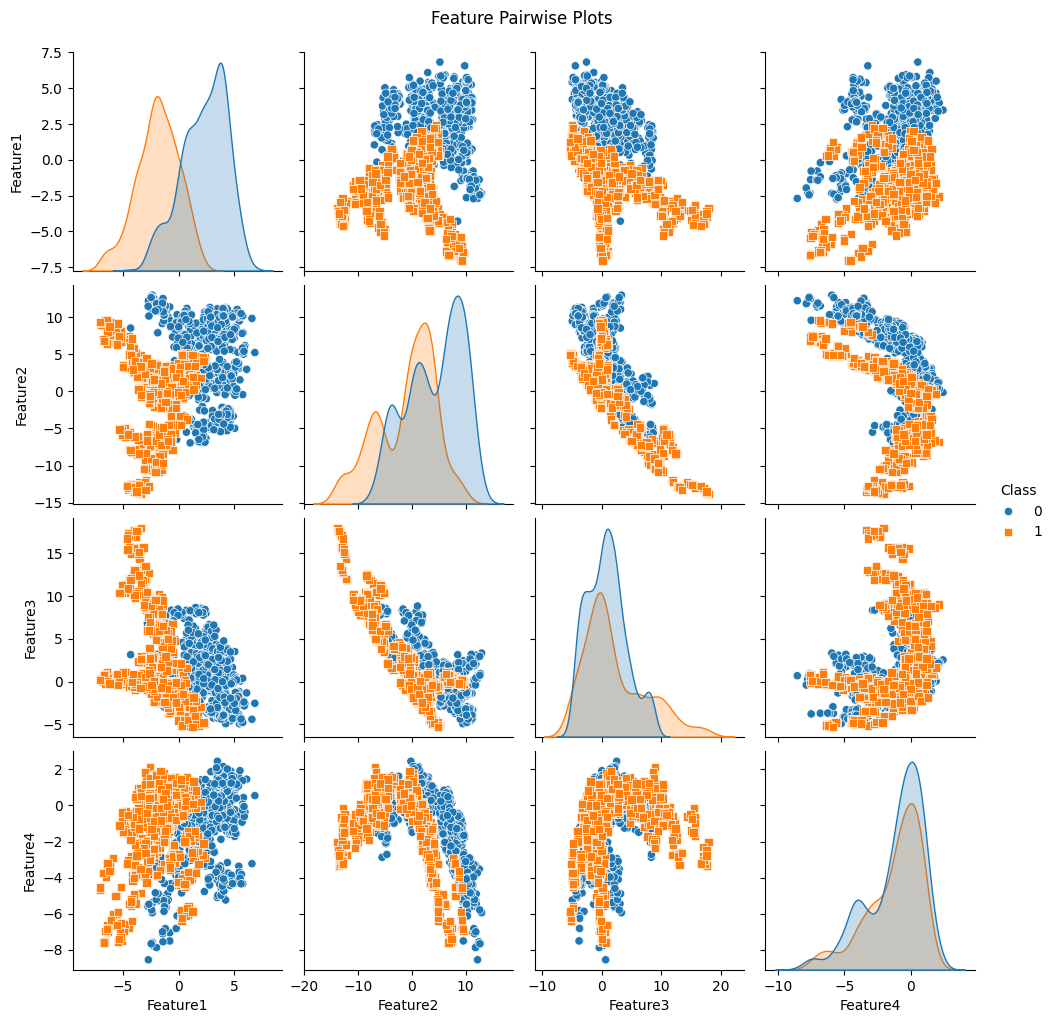

In [9]:
df.columns = ["Feature1", "Feature2", "Feature3", "Feature4", "Class"]

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue="Class", diag_kind="kde", markers=["o", "s"])
plt.suptitle("Feature Pairwise Plots", y=1.02)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


In [15]:
X = df[["Feature1", "Feature2", "Feature3", "Feature4"]]
y = df["Class"]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [17]:
model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,
    min_samples_split=2,
    random_state=42
)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       153
           1       0.94      1.00      0.97       122

    accuracy                           0.97       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275



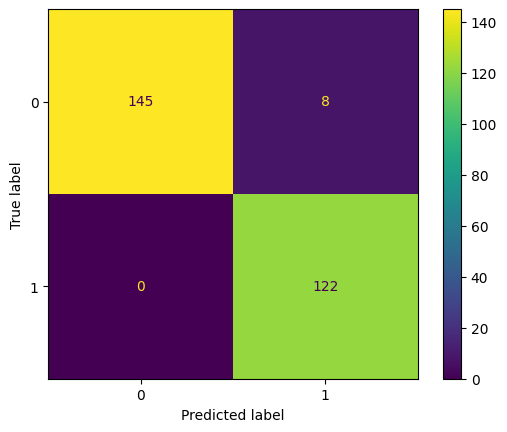

In [18]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)


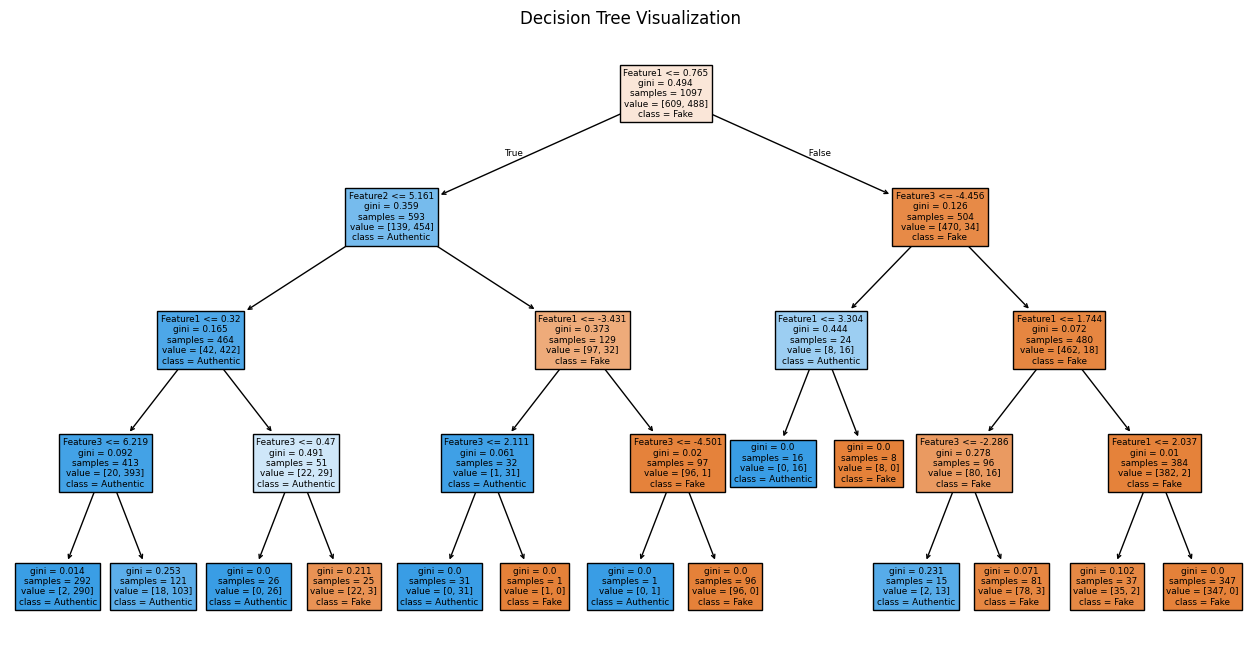

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plot_tree(model, feature_names=X.columns, class_names=["Fake", "Authentic"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


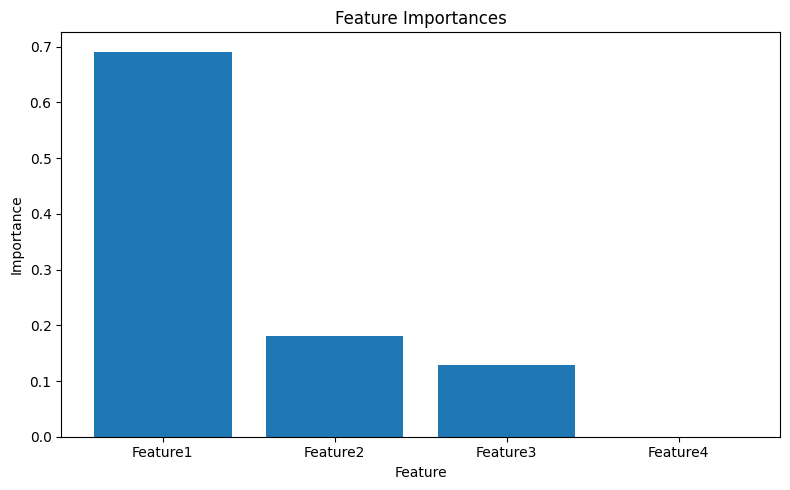

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Önem değerlerini al
feature_importances = model.feature_importances_

# DataFrame'e çevir
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Görselleştir
plt.figure(figsize=(8, 5))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.title("Feature Importances")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()
